In [1]:
from typing import Union, List
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np

In [2]:
def V(num: int) -> int:
    return 4*num+1

def S(num: int) -> int:
    return 2*num+1

def fG(num: int) -> int:
    return 2*num-1

def getType(num):
    if (num+1) % 3 == 0:
        return "A"
    elif (num % 3) == 0:
        return "B"
    elif (num - 1) % 3 == 0:
        return "C"

def toBinVec(x, l=0) -> list:
    result = [int(i) for i in bin(x)[2:]]
    missing_zeros = l-len(result)
    if (missing_zeros > 0):
        for i in range(missing_zeros):
            result.insert(0, 0)
    return result

def ruleTwo(num):
    result = (num-1)/2
    r = 0
    k = 0
    while result % 2 != 0:
        result = (result-1)/2
        k+=1
    r = result/2
    if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
        return True
    else:
        return False


def debugTree(self):
    for row in self.rows:
        for node in row:
            print("{0}-{1}".format(node.label, node.state), end =" ")
        print('\n')

In [3]:
class Tree:
    def __init__(self, num_rows):
        self.num_rows = num_rows
        self.rows = []
        self.markedRows = []
        self.generate()
 
    def generate(self):
        counter = 2
        start = 1
        end = 1

        for i in range(0,self.num_rows):
            row = []
            if i == 0:
                start = 1
                end = 1
                node = Node(1)
                row.append(node)
            elif i == 1:
                start = 3
                end = 3
                node = Node(3)
                row.append(node)
            else:
                start = end+2
                end = 3**counter
                counter +=1

                for j in range(start, end+1):
                    if j % 2 == 1:
                        node = Node(j)
                        row.append(node)
            
            self.rows.append(row)  

   
    def getNode(self, label):
        for row in self.rows:
            for node in row:
                if node.label == label:
                    return node
        
        
        # row = Node.getRow(label)
        # position = Node.getPos(label,row)
        # if row < self.num_rows:
        #     return self.rows[row][position+1]
        # return None

    def getGeom(self) -> Union[List[int], List[int], List[str]]:
        arr_x = []
        arr_y = []
        arr_colors = []
        for i, row in enumerate(self.rows):
            for j, node in enumerate(row):
                row_half = len(row) / 2
                x = 0.5 if (row_half < 1) else j-row_half+1
                arr_x.append(x)
                arr_y.append(i)
                color = "black"
                if node.state == NodeState.ORANGE:
                    color = "orange"
                elif node.state == NodeState.BLUE:
                    color = "blue"
                arr_colors.append(color)
                if node.state == NodeState.BLACK:
                    rowIsMarked = False
        return arr_x, arr_y, arr_colors
   
    def mark(self, label):
        node = self.getNode(label)
        if node is not None and node.state != NodeState.BLUE:
            #print("{0}".format(label))
            node.state = NodeState.ORANGE

    def checkTreeFrozen(self) -> bool:
        for row in self.rows:
            for node in row:
                if node.state == NodeState.ORANGE:
                    return False
                
        return True

    def checkRowMarked(self) -> int:
        #print(self.markedRows)
        for i, row in enumerate(self.rows):
            rowIsMarked = True
            for node in row:
                if node.state == NodeState.BLACK:
                    rowIsMarked = False
                    break
            if rowIsMarked == True:
                if i not in self.markedRows:
                    self.markedRows.append(i)
                    return i            
        return -1

    def debugTree(self):
        for row in self.rows:
            for node in row:
                print("{0}-{1}".format(node.label, node.state), end =" ")
            print('\n')

class NodeState():    
    BLACK = 1
    ORANGE = 2
    BLUE = 3


class Node:
    def __init__(self, label):
        self.tree = None
        self.row = Node.getRow(label)
        self.state = NodeState.BLACK
        self.label = label
   
    @staticmethod
    def getPos(label: int, row: int) -> int:
        pos = -1

        for i in range(3**(row-2)+2, 3**(row-1)+1, 2):
            if i != label:
                pos +=1
                
            else:
                pos+=1
                
        return pos


    @staticmethod
    def getRow(label: int) -> int:
        
        counter = 2
        if label == 1:
            return (1)
        elif label == 3:
            return (2)

        while 3**counter < label:
            counter +=1

        counter +=1
        return int(counter)
 
    @staticmethod
    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1

def isIncluded(numberArr, number):

    if len(numberArr) > 0:
        numberArr.sort()
        
        left = int(0)
        right = int(len(numberArr)-1)
        i = int(0)
        
        
        while left <= right:
            
            i = int((left + right)/2)
            if numberArr[i] == number:
                return True
            
            elif numberArr[i] < number:
                left = i+1
            else:
                right = i-1
        
            
        if numberArr[i] == number:
            return True
        else:
            return False
    else:
        return False

def setStartArr(n):
    for i in range(0,n):
        if i == 0:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(1)
        elif i == 1:
            arrInfo.append(1)
            saveArrInfo.append(1)
            rowStartLabel.append(3)
        elif i == 2:
            arrInfo.append(2)
            saveArrInfo.append(2)
            rowStartLabel.append(5)
        else:
            arrInfo.append(2**(i-1))
            saveArrInfo.append(2**(i-1))
            rowStartLabel.append(2**i + 1)
        
        blue_expense.append(0)

    return arrInfo, saveArrInfo, rowStartLabel, blue_expense

def getCounter(rowStartLabel, value):
    
    counter = 0
    
    for start in rowStartLabel:
        if counter != len(rowStartLabel):
            if value < rowStartLabel[counter]:
                break
            else:
                counter = counter + 1
        elif counter == len(rowStartLabel):
            break

    return counter

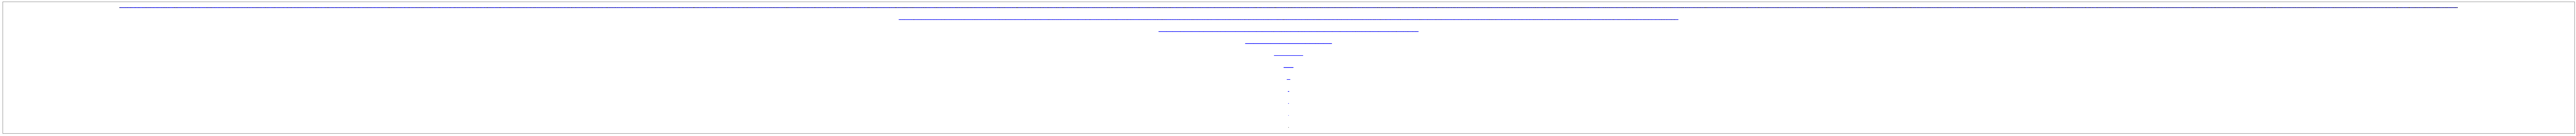

In [6]:
# dotsize=24 (n<=6)
#dotsize= 6 #(n=9)
dotsize= 1 #(n>9)
n = 11

tree = Tree(n)
#########################################################
proved = []
start = 3

#tree.debugTree()



first_node = tree.getNode(start)

first_node.state = NodeState.BLUE
tree.mark(start)
proved.append(start)
proved.append(5)
included = []
included.append(start)
included.append(5)

#node = tree.getNode(7)
#print(node.label)



while len(proved)>0:
    for i in proved:
        #print(i)
        if i < 3**(n-1)+1:
            
            node = tree.getNode(i)
            #tree.mark(i)

            if Node.getType(i) == 2:
                # RULE 1 : if x is orange V(x) becomes orange 
                if isIncluded(included, V(i)) == False and V(i) < 3**(n-1)+1:
                    tree.mark(V(i))
                    proved.append(V(i))
                    included.append(V(i))

                # RULE 2 : if x is orange S(x) becomes orange
                if isIncluded(included, S(i)) == False and S(i) < 3**(n-1)+1:    
                    r2 = ruleTwo(i)
                    if r2:
                        tree.mark(S(i))
                        proved.append(S(i))
                        included.append(S(i))
                
                node.state = NodeState.BLUE
                proved.remove(i)

                # counter = getCounter(rowStartLabel, i)
                # blue_expense[counter-1] += 1

                break

            if Node.getType(i) == 3:
                # RULE 1 : if x is orange V(x) becomes orange 
                if isIncluded(included, V(i)) == False and V(i) < 3**(n-1)+1:   
                    tree.mark(V(i)) 
                    proved.append(V(i))  
                    included.append(V(i))   
     
                # RULE 2 : if x is orange S(x) becomes orange
                if isIncluded(included, S(i)) == False and S(i) < 3**(n-1)+1:       
                    r2 = ruleTwo(i)
                    if r2:
                        tree.mark(S(i))
                        proved.append(S(i))
                        included.append(S(i))

                # RULE 3 : if x is orange and of type C then ((4x-1)/3) becomes orange         
                if isIncluded(included, int((4*i-1)/3)) == False and int((4*i-1)/3) < 3**(n-1)+1:       
                    tree.mark(int((4*i-1)/3))
                    proved.append(int((4*i-1)/3))
                    included.append(int((4*i-1)/3))

                node.state = NodeState.BLUE
                proved.remove(i)

                # counter = getCounter(rowStartLabel, i)
                # blue_expense[counter-1] += 1

                break
            
            if Node.getType(i) == 1:
                # RULE 1 : if x is orange V(x) becomes orange 
                if isIncluded(included, V(i)) == False and V(i) < 3**(n-1)+1:
                    tree.mark(V(i))
                    proved.append(V(i))
                    included.append(V(i))

                # RULE 2 : if x is orange S(x) becomes orange
                if isIncluded(included, S(i)) == False and S(i) < 3**(n-1)+1:       
                    r2 = ruleTwo(i)
                    if r2:
                        tree.mark(S(i))
                        proved.append(S(i))
                        included.append(S(i))

                # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange
                if isIncluded(included, int(fG(i)/3)) == False and int(fG(i)/3) < 3**(n-1)+1: 
                    tree.mark(int(fG(i)/3))
                    proved.append(int(fG(i)/3))
                    included.append(int(fG(i)/3))


                node.state = NodeState.BLUE
                proved.remove(i)


                break
###################################################################################





fig = plt.gcf()

#fig.set_size_inches(3, 2)# -> n=6
#fig.set_size_inches(16, 8)# -> n=9
#fig.set_size_inches(140, 10)# -> n=12
fig.set_size_inches(190, 10)

x, y, colors = tree.getGeom()
plt.scatter(x, y, s=dotsize, c=colors)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)     
fig.savefig("test", format='png', dpi=300)

plt.show()

#############################################################


Total number of points in blue below 2**17
[416, 437, 443, 448, 452, 456, 459, 461, 463, 464, 465]

total expense


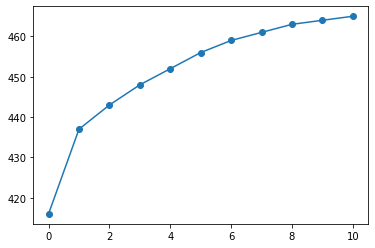

In [26]:
#plotit
# 2047 below 2**17


rows = [0,1,2,3,4,5,6,7,8,9,10]
total_number = [416,437,443,448,452,456,459,461,463,464,465]

print()
print("Total number of points in blue below 2**17")
print(total_number)
print()
print("total expense")
plt.plot(rows, total_number, marker = 'o', linestyle = 'solid')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%.0f"))
plt.show()
#plt.savefig("expanses.png",dpi=300)
#print()
#print("log(expense)")
#plt.yscale('log')
#plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')


#plt.legend()

#plt.show()
#plt.savefig("expanses_log2.png",dpi=300)

In [1]:
label = 89

counter = 2
if label == 1:
    print(1)
elif label == 3:
    print(2)

while 3**counter < label:
    counter +=1

counter +=1

print(counter)

6


In [2]:
label = 89
row = 6
pos = -1

for i in range(3**(row-2)+2, 3**(row-1)+1, 2):
    if i != label:
        pos +=1
        
    else:
        pos+=1

        print(pos)

3
